In [2]:
import numpy as np
import pandas as pd
import cv2

In [3]:
test_image = cv2.imread("color_image.jpg")

In [4]:
index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

In [5]:
clicked = False
r = g = b = xpos = ypos = 0

In [6]:
def recognize_color(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [7]:
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

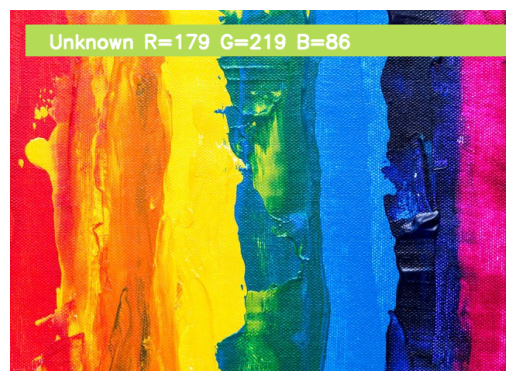

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/color_image.jpeg")


if img is None:
    print("Could not load image. Check the file path.")
    exit()


def recognize_color(r, g, b):
    if r > 200 and g < 100 and b < 100:
        return "Red"
    elif r < 100 and g > 200 and b < 100:
        return "Green"
    elif r < 100 and g < 100 and b > 200:
        return "Blue"
    else:
        return "Unknown"


height, width, _ = img.shape

x_center, y_center = width // 2, height // 2


b, g, r = img[y_center, x_center]
b = int(b)
g = int(g)
r = int(r)


cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)


color_name = recognize_color(r, g, b)
text = color_name + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)


if r + g + b >= 600:
    cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
else:
    cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
